In [1]:
# ใช้ conda env --name snakes
import cv2
import numpy as np
from matplotlib import pyplot as plt

from keras import Model, Input
import keras.utils as image
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.datasets import fashion_mnist

from sklearn.model_selection import train_test_split

Original Image

(1063, 858, 3)


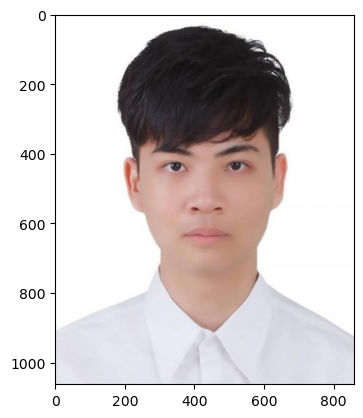

In [29]:
image = cv2.imread("./images/jem.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image/255.0
print(image.shape)
plt.imshow(image)

ข้อ 5.1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


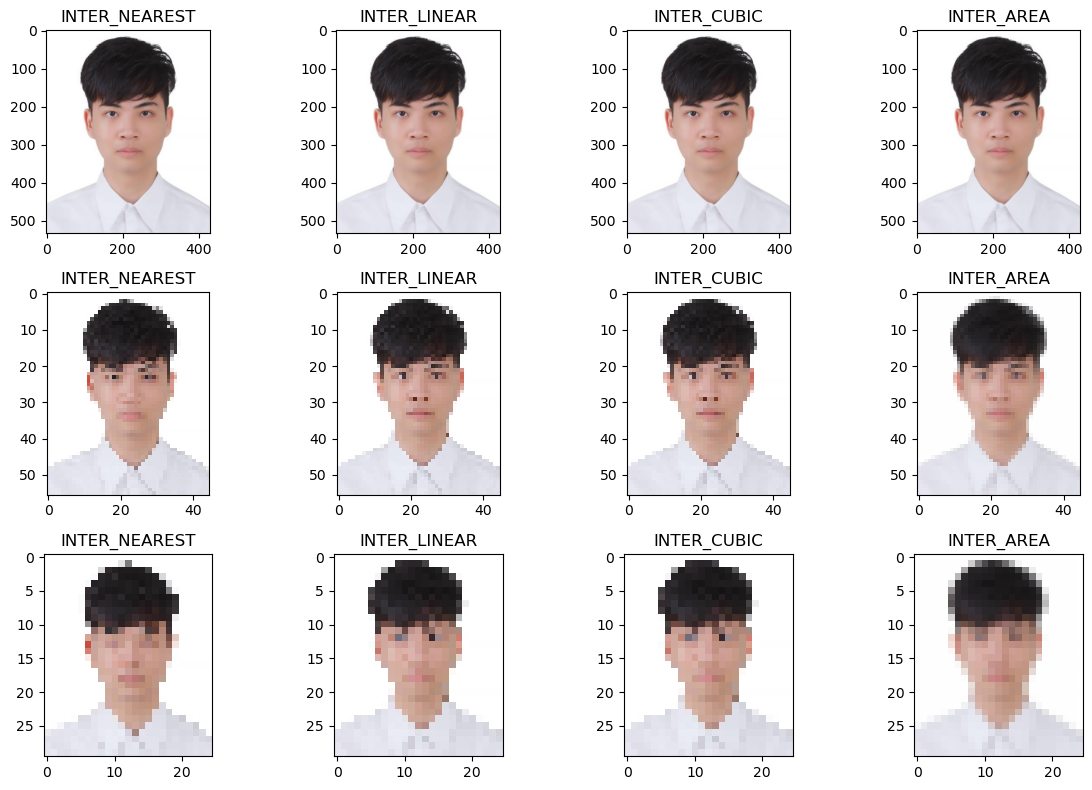

In [30]:
# Define interpolation method
inter_methods = [cv2.INTER_NEAREST, cv2.INTER_LINEAR,
                 cv2.INTER_CUBIC, cv2.INTER_AREA]
names = ["INTER_NEAREST", "INTER_LINEAR", "INTER_CUBIC", "INTER_AREA"]
# Define resize factor
reduce_factors = [2, 19, 35]

plt.figure(figsize=(12, 8))
for i, factor in enumerate(reduce_factors):
    scale_factors = 1/factor
    for j, method in enumerate(inter_methods):
        resized_image = cv2.resize(
            image, None, fx=scale_factors, fy=scale_factors, interpolation=method)

        plt.subplot(len(reduce_factors), len(
            inter_methods), i*len(inter_methods)+j+1)
        plt.imshow(resized_image)
        plt.title(f"{names[j]}")
        plt.axis("on")

plt.tight_layout()
plt.show()

ข้อ 5.2

In [33]:
# Define fill method
fill_method = ["constant", "nearest", "reflect", "wrap"]
# Define parameters
npic = 5
rotation_range = 40
width_shift_range = 0.2
height_shift_range = 0.2
shear_range = 0.2
zoom_range = 0.2
horizontal_flip = True

def add_gaussian_noise(image):
    noise_mean = 0
    noise_std = 0.5
    noise_factor = 0.6
    noisy_image = image + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=image.shape))
    return np.clip(noisy_image,0,1)

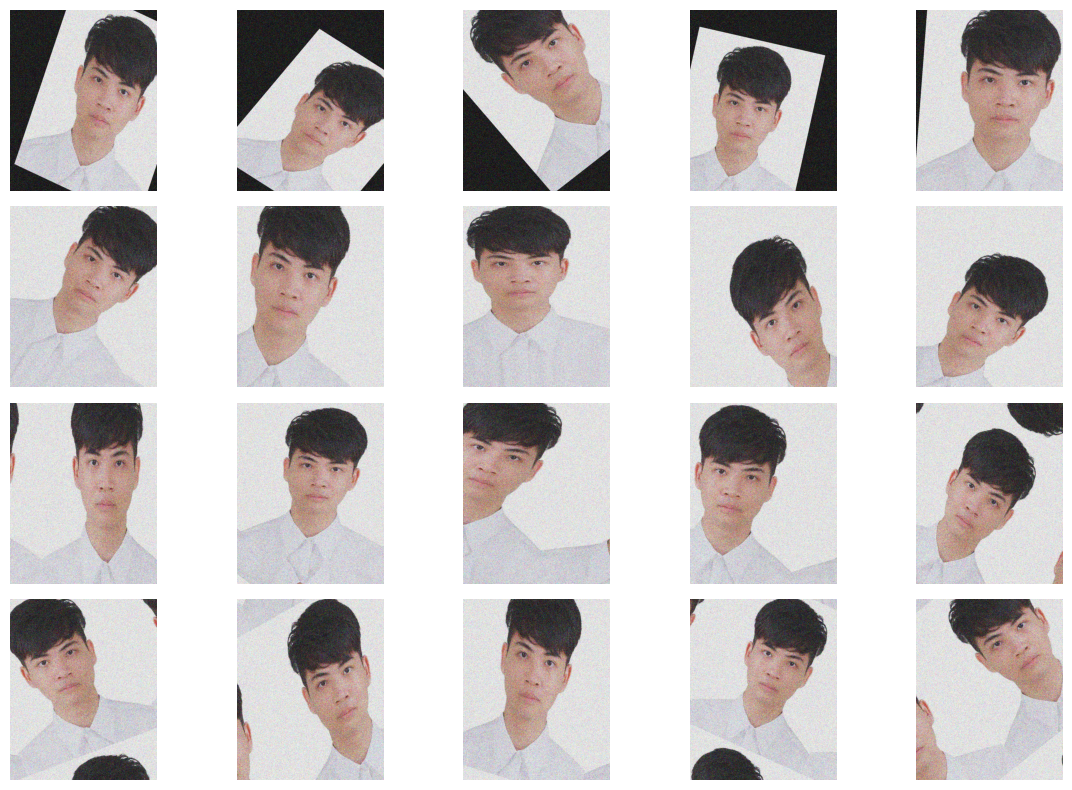

In [34]:
# Define ImageDataGenerator with parameters
num_methods = len(fill_method)
plt.figure(figsize=(12, 8))

for i, m in enumerate(fill_method):
    datagen = ImageDataGenerator(
        rotation_range=rotation_range,
        width_shift_range=width_shift_range,
        height_shift_range=height_shift_range,
        shear_range=shear_range,
        zoom_range=zoom_range,
        horizontal_flip=horizontal_flip,
        preprocessing_function=add_gaussian_noise,
        fill_mode=m
    )

    pic = datagen.flow(np.expand_dims(image, axis=0), batch_size=1)

    for j in range(npic):
        batch = pic.next()
        image_result = batch[0]

        # Plot each augmented image in a separate subplot
        plt.subplot(num_methods, npic, i * npic + j + 1)
        plt.imshow(image_result)
        plt.axis("off")

plt.tight_layout()
plt.show()

ข้อ 5.3

In [35]:
# Read image from fashion_mnist dataset
(x_train, _),(x_test, _) = fashion_mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0
x_train, x_test = train_test_split(x_train, random_state=0.3, test_size=40)
x_train, x_val = train_test_split(x_train, random_state=0.2, test_size=40)

4422102/4422102 [==============================] - 0s 0us/step
